In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
import pandas 
import seaborn as sns 
import numpy as np 

plt.style.use('ggplot')

In [8]:
from sklearn import ensemble, decomposition, preprocessing, manifold, pipeline, linear_model

In [9]:
t = pandas.read_csv('../data_set/bglb_data_set.csv', index_col='mutant_name')
t.kcat = t.kcat.map(lambda x: np.log10(x/880) or 0)
t.km = t.km.map(lambda x: np.log10(x/5) or 0)
t.kcatkm = t.kcatkm.map(lambda x: np.log10(x/174000) or 0)
t.drop([col for col in t if 'Un' in col], axis=1, inplace=True)
t = t.replace([np.inf, -np.inf], 0)
print(t.shape)
t.head()

(111, 3)


,kcat,km,kcatkm
mutant_name,,,
S14A,-0.439333,0.217484,-0.651460
T15A,-0.156314,0.025306,-0.176657
S16A,-0.756962,0.447468,-1.199275
S17A,-0.016087,0.567026,-0.577999
S17E,-0.137625,0.165541,-0.298065


In [10]:
t.query('kcat==0')

,kcat,km,kcatkm
mutant_name,,,
BglB,0.0,0.0,0.0


In [11]:
targets = 'kcat km kcatkm'.split()

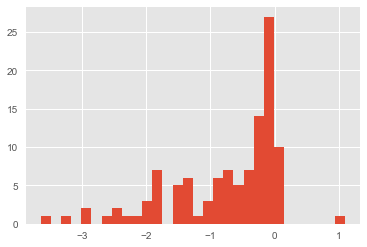

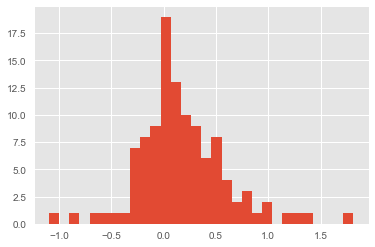

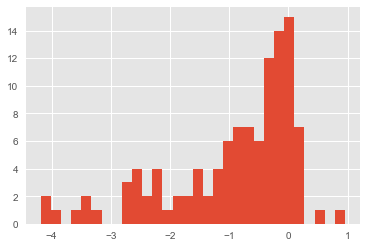

In [12]:
for target in targets:
    plt.hist(t[target], bins=30)
    plt.show()

In [13]:
# so we want to predict the price of the house ... 

In [14]:
# let's add the identity of the native and the designed residue as features 
# f1 = one_hot_encode(n[-1]) for n in df.index 

In [15]:
desired_features = [
'total_score',
'fa_rep',
'hbond_sc',
'tot_pstat_pm',
'tot_nlpstat_pm',
'tot_burunsat_pm',
'tot_hbond_pm',
'tot_NLconts_pm',
'tot_nlsurfaceE_pm',
# 'tot_total_charge',
# 'tot_total_pos_charges',
# 'tot_total_neg_charges',
# 'tot_seq_recovery',
'SR_1_total_score',
'SR_1_fa_rep',
'SR_1_hbond_sc',
'SR_1_hbond_pm',
'SR_1_burunsat_pm',
'SR_1_pstat_pm',
'SR_1_nlpstat_pm',
'SR_2_total_score',
'SR_2_fa_rep',
'SR_2_hbond_sc',
'SR_2_hbond_pm',
'SR_2_burunsat_pm',
'SR_2_pstat_pm',
'SR_2_nlpstat_pm',
'SR_3_total_score',
'SR_3_fa_rep',
'SR_3_hbond_sc',
'SR_3_hbond_pm',
'SR_3_burunsat_pm',
'SR_3_pstat_pm',
'SR_3_nlpstat_pm',
'SR_4_total_score',
'SR_4_fa_rep',
'SR_4_hbond_sc',
'SR_4_hbond_pm',
'SR_4_burunsat_pm',
'SR_4_pstat_pm',
'SR_4_nlpstat_pm',
'SR_5_total_score',
'SR_5_fa_rep',
'SR_5_hbond_sc',
'SR_5_interf_E_1_2',
'SR_5_dsasa_1_2',
'SR_5_hbond_pm',
'SR_5_burunsat_pm']

In [24]:
f = pandas.read_hdf('../rosetta_runs/bglb/enzyme_design/features.h5')
scaler = preprocessing.StandardScaler()
f = pandas.DataFrame(scaler.fit_transform(f), columns=f.columns, index=f.index)[desired_features]
print(f.shape)
f.head()

(7967, 44)


,total_score,fa_rep,hbond_sc,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,tot_NLconts_pm,tot_nlsurfaceE_pm,SR_1_total_score,...,SR_4_burunsat_pm,SR_4_pstat_pm,SR_4_nlpstat_pm,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
N1A,-0.479693,-0.417646,-0.546276,2.030579,1.719945,-0.499857,0.649158,0.501668,1.246296,1.038815,...,-0.080141,0.896101,0.795424,-0.401840,-0.407716,-0.097690,-0.407670,-0.549353,1.400013,-0.215337
N1C,-0.473516,-0.419991,-0.157913,1.834224,1.719945,-0.499857,0.359736,0.755430,-0.178649,0.528124,...,-0.080141,-0.626257,-1.116040,-1.206252,-0.338407,0.142902,-1.209815,-1.214754,0.633365,-0.215337
N1D,-0.477528,-0.418966,-0.416821,0.656095,0.582310,0.148023,0.070315,1.009192,-0.344403,0.308333,...,-0.080141,0.852605,0.293665,-0.199575,-0.280650,-0.168774,-0.203065,-0.682433,-0.644381,-0.215337
N1E,-0.428130,-0.419762,-0.758110,-0.522035,-0.100272,-0.553847,0.938580,0.565109,0.291877,0.634787,...,-0.080141,0.482889,1.010464,-1.164404,-0.307604,-1.180353,-1.162151,-0.549353,0.888914,-0.215337
N1F,-0.471979,-0.421643,-1.006034,0.459740,0.354782,-0.175917,0.576803,0.882311,1.345213,0.667109,...,-0.080141,2.461954,1.416650,-1.157430,-0.723455,-0.447641,-1.155176,-0.150112,0.888914,-0.215337


In [25]:
df = t.join(f).dropna()
df.shape

(106, 47)

In [26]:
unlabeled = [n for n in f.index if n not in df.index]
U = f.loc[unlabeled]
U.shape

(7866, 44)

In [27]:
pos = set([n[1:-1] for n in df.index ])
unlabeled_known_pos = [n for n in f.index if n[1:-1] in pos]
U_known_pos = f.loc[unlabeled_known_pos]
U_known_pos.shape

(1065, 44)

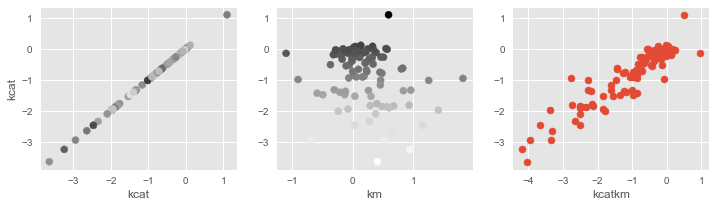

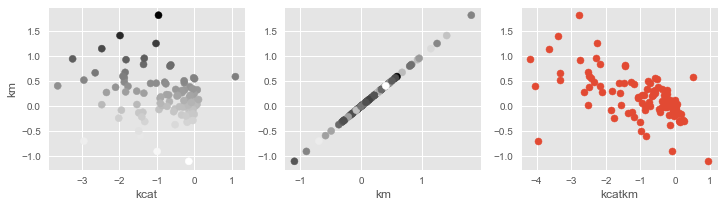

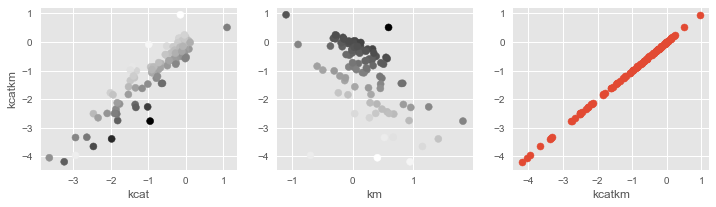

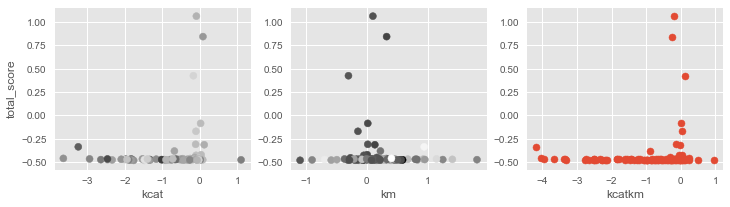

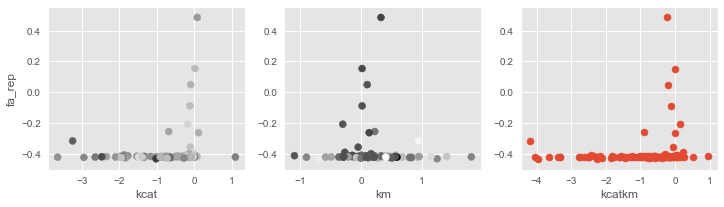

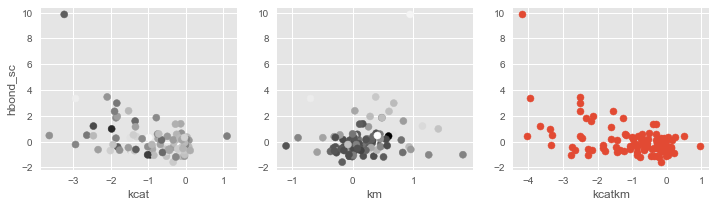

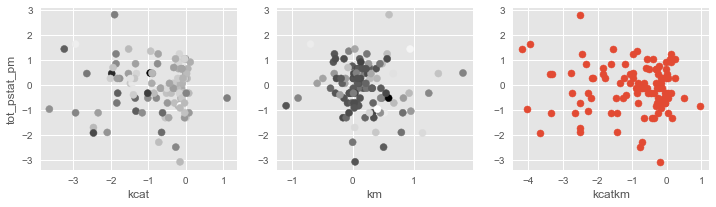

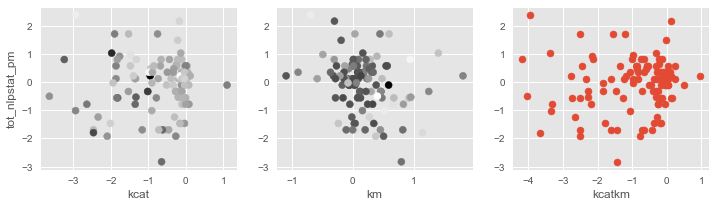

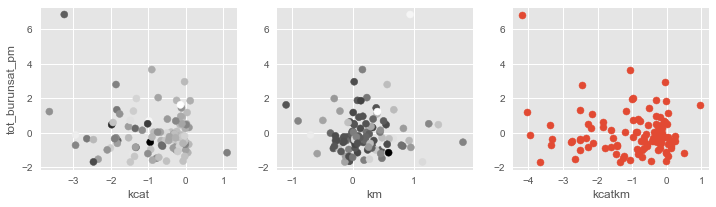

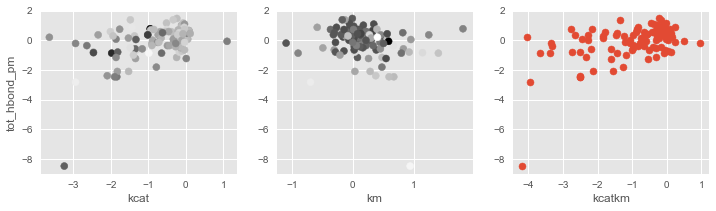

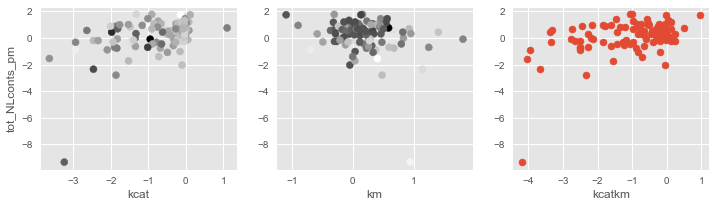

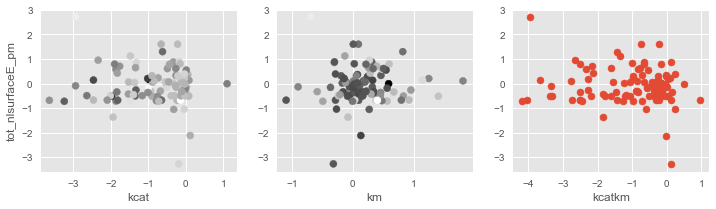

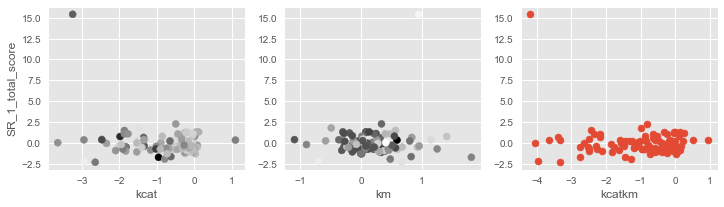

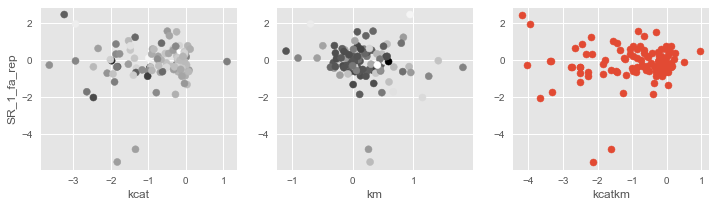

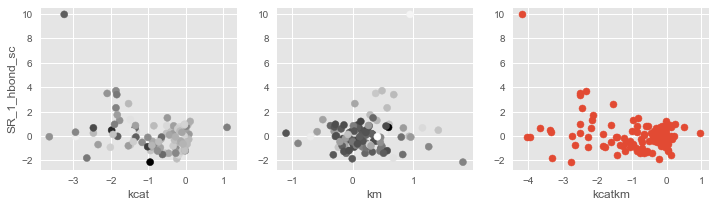

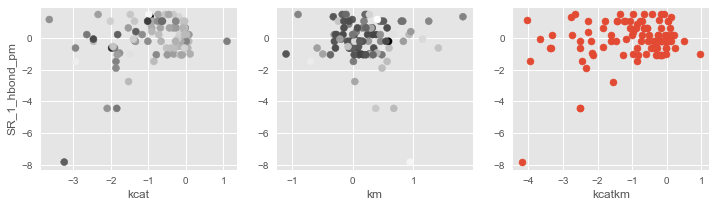

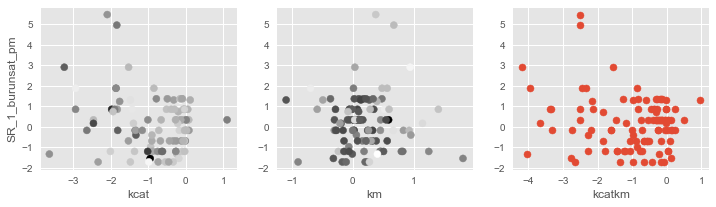

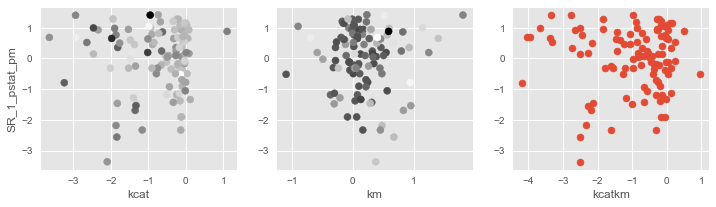

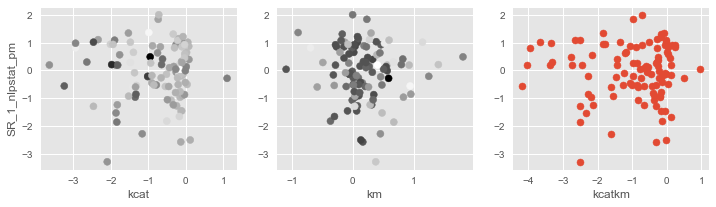

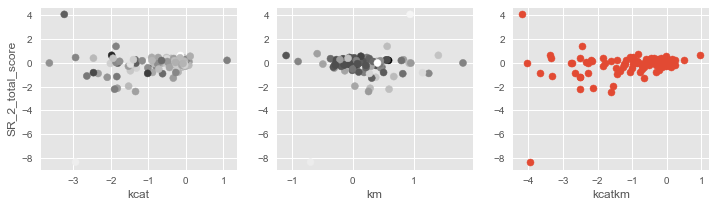

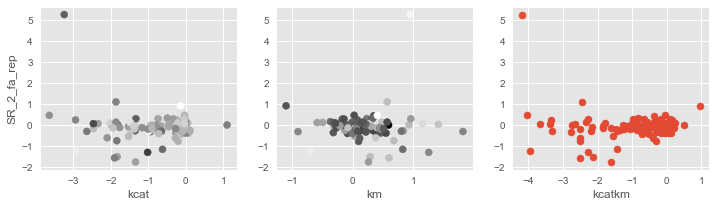

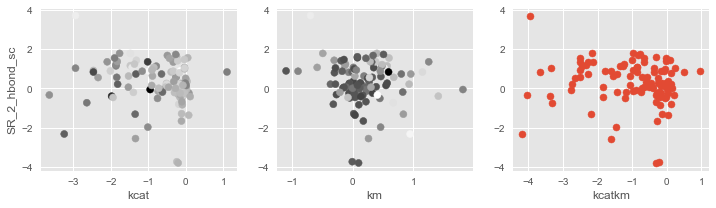

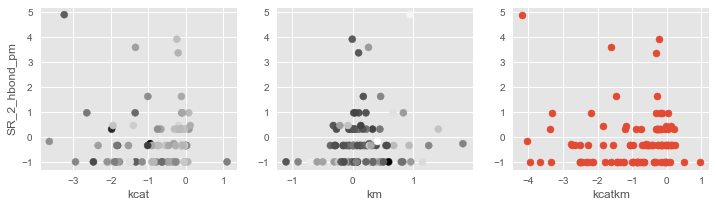

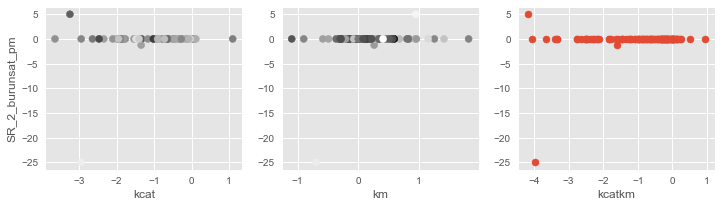

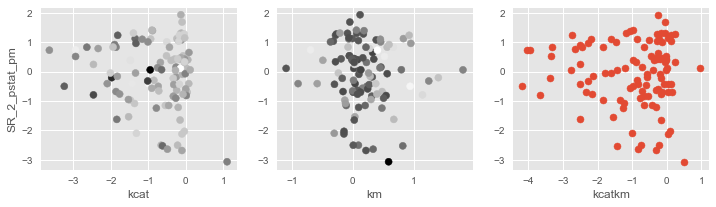

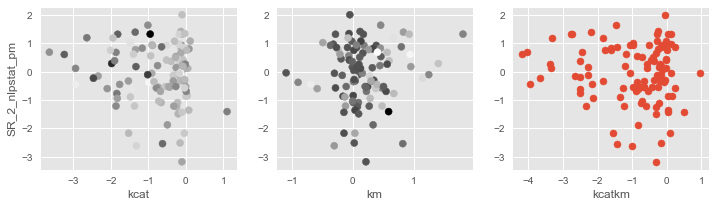

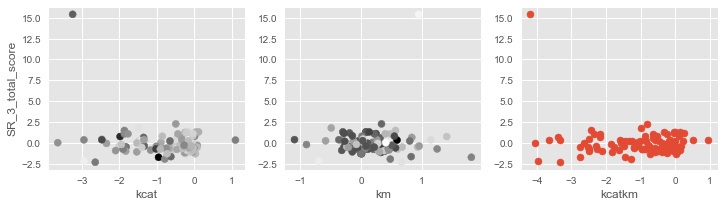

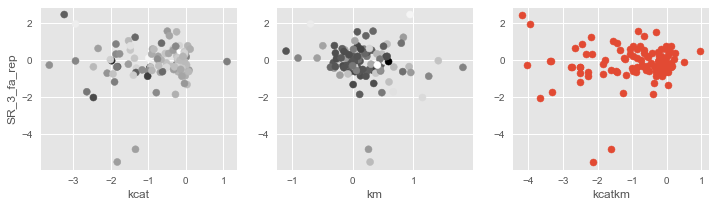

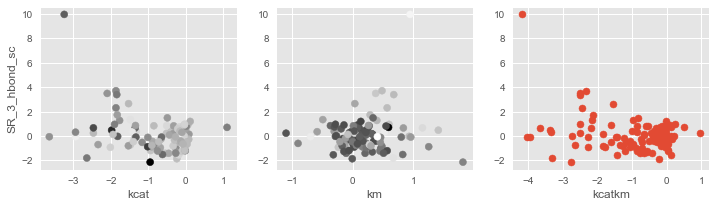

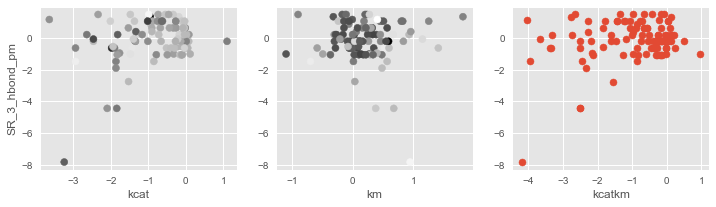

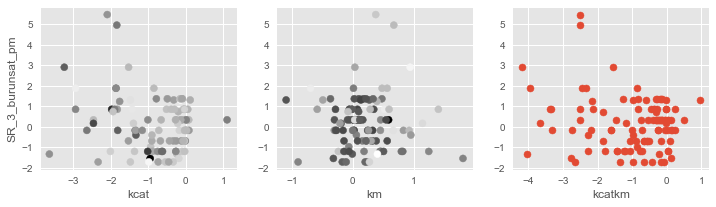

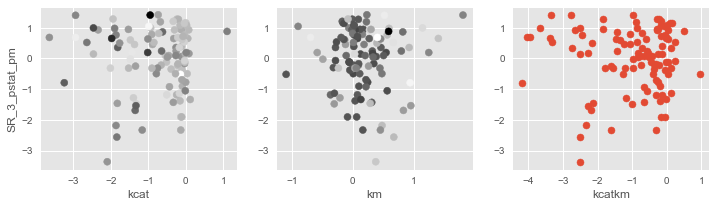

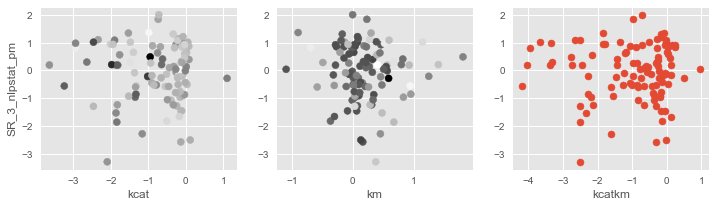

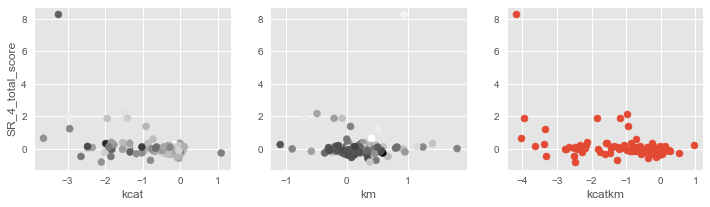

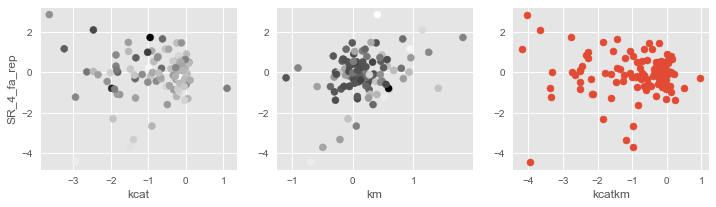

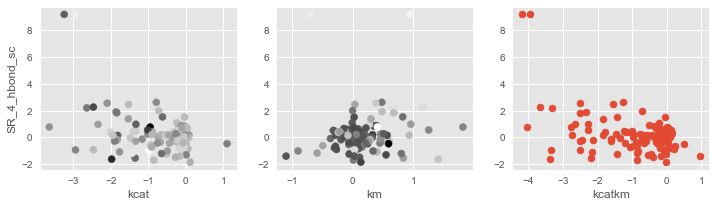

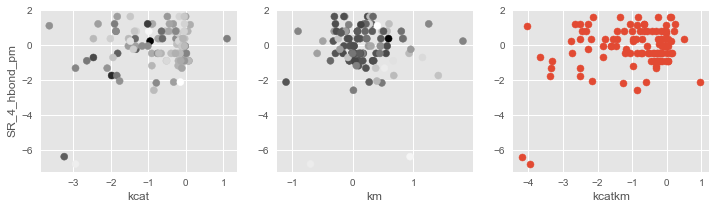

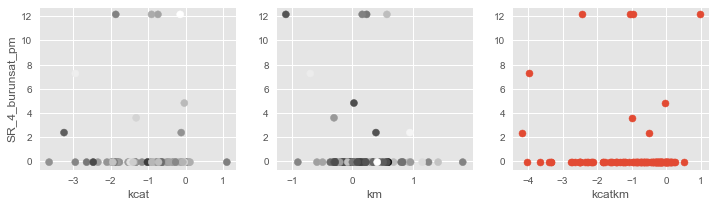

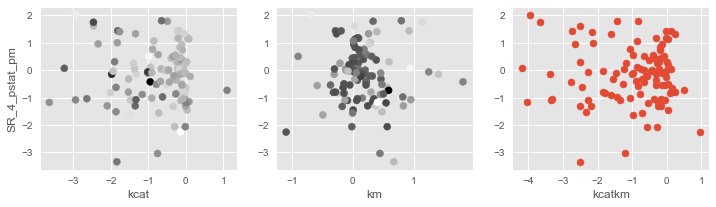

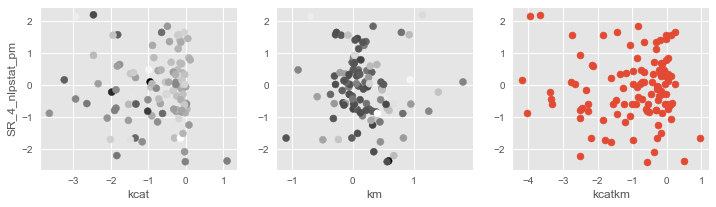

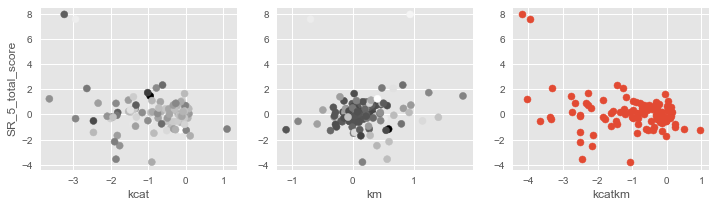

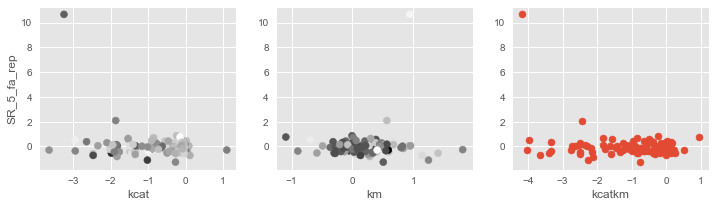

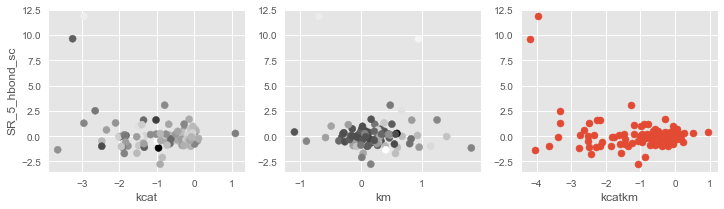

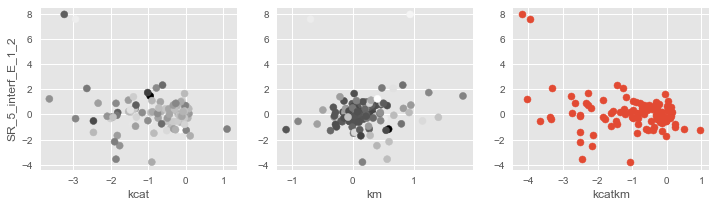

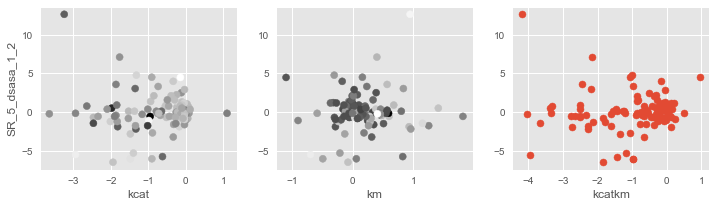

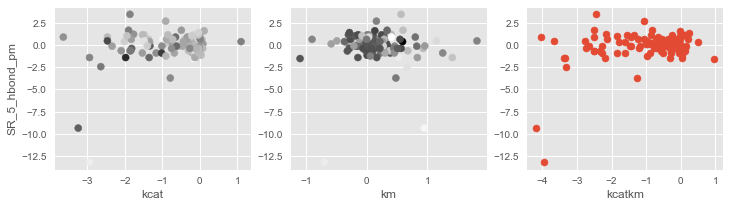

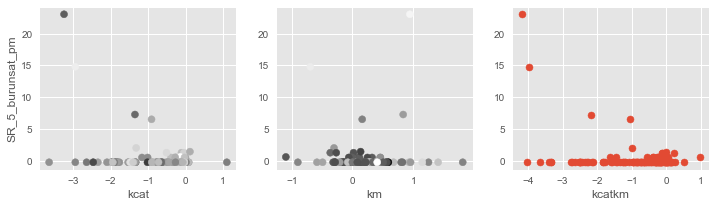

In [28]:
for col in df:
    plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.scatter(df.kcat, df[col], c=df.km)
    plt.ylabel(col)
    plt.xlabel('kcat')
    plt.subplot(132)
    plt.scatter(df.km, df[col], c=df.kcat)
    plt.xlabel('km')
    plt.subplot(133)
    plt.scatter(df.kcatkm, df[col])
    plt.xlabel('kcatkm')
    plt.show()

In [29]:
df.head()

,kcat,km,kcatkm,total_score,fa_rep,hbond_sc,tot_pstat_pm,tot_nlpstat_pm,tot_burunsat_pm,tot_hbond_pm,...,SR_4_burunsat_pm,SR_4_pstat_pm,SR_4_nlpstat_pm,SR_5_total_score,SR_5_fa_rep,SR_5_hbond_sc,SR_5_interf_E_1_2,SR_5_dsasa_1_2,SR_5_hbond_pm,SR_5_burunsat_pm
A192S,0.031408,0.007748,0.028609,-0.421818,-0.410743,0.348136,0.263385,0.582310,1.173832,0.576803,...,-0.080141,-1.452680,-0.733747,0.535090,-0.057322,0.667830,0.537466,1.047610,-1.155480,-0.215337
C167A,-0.264147,0.464191,-0.723565,-0.477411,-0.421557,-0.173604,-0.129325,-0.327799,-0.985767,0.142670,...,-0.080141,-0.321786,0.102519,0.772229,-0.157435,-0.163306,0.768809,-0.416273,-0.388832,-0.215337
C167Q,-0.242052,-0.007005,-0.230186,-0.467859,-0.412265,-1.167656,0.754272,0.639191,0.080535,1.463157,...,-0.080141,0.292595,-0.333534,0.853019,0.866793,-0.803061,0.851639,0.615099,-0.069395,-0.215337
C167S,-0.953700,1.814514,-2.763251,-0.475393,-0.421163,-1.017716,0.481557,0.228378,-0.541850,0.769750,...,-0.080141,-0.423276,0.107828,1.464271,-0.258403,-1.161519,1.463096,-0.549353,0.462999,-0.215337
D322A,-0.941022,-0.065502,-0.870557,-0.479739,-0.419079,-0.452825,1.354245,0.481186,-0.961772,0.689356,...,-0.080141,0.108341,-0.051461,0.144250,-0.117219,0.035365,0.144273,1.372917,0.179055,-0.215337


In [30]:
X = df.ix[:, 3:]
y = df.ix[:, 0] # kcat 

X.shape, y.shape

((106, 44), (106,))

In [51]:
from sklearn.metrics import r2_score

In [52]:
pred_list = []
plt.figure(figsize=(12,3))
for i, target in enumerate(targets,1):

    y = df[target]
    
    net = linear_model.ElasticNetCV(cv=10, max_iter=1e9, n_alphas=1000, eps=0.01, l1_ratio=[0.5,0.9,0.99])
    clf = ensemble.BaggingRegressor(net, oob_score=True, n_jobs=-1)

    clf.fit(X, y)
    pred = clf.predict(X)
    pred_list.append((y, pred))

/Users/alex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:986: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


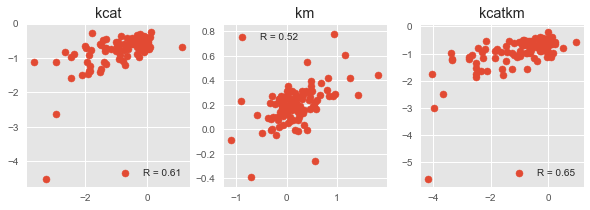

In [50]:
plt.figure(figsize=(10,3))
for i, (t, (x, y)) in enumerate(zip(targets, pred_list), 1):
    plt.subplot(1, 3, i)
    plt.title(t)
    plt.scatter(x, y)
    r = np.sqrt(r2_score(x, y)).round(2)
    plt.legend(['R = {}'.format(r)])

In [ ]:
# what does it look like if we predict unlabeled data? 
plt.figure(figsize=(10,3))
for i, (t, (x, y)) in enumerate(zip(targets, pred_list), 1):
    plt.subplot(1, 3, i)
    plt.title(t)
    plt.scatter(x, y)
    r = np.sqrt(r2_score(x, y)).round(2)
    plt.legend(['R = {}'.format(r)])
    
    # unlabeled data 
    unlab = clf.predict(U)
    

/Users/alex/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1661: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  y = y[not_na]
/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/alex/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3029: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


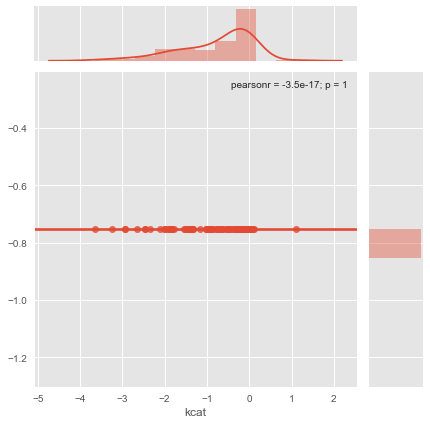

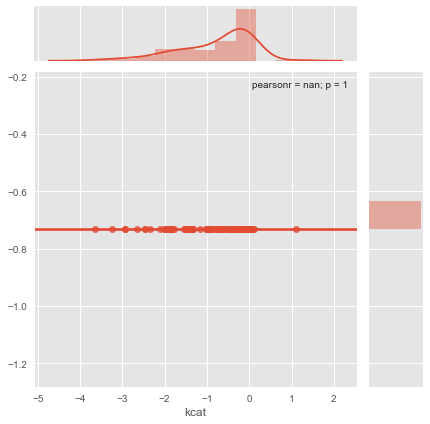

In [26]:
plt.figure(figsize=(12,3))
for i, target in enumerate(targets,1):

    y = df[target]
    
    net = linear_model.ElasticNetCV(cv=10, max_iter=1e9, n_alphas=1000, eps=0.01, l1_ratio=[0.5,0.9,0.99])
    clf = ensemble.BaggingRegressor(net, oob_score=True, n_jobs=-1)
    clf.fit(X, y)
    pred = clf.predict(X)
    oob = clf.oob_prediction_
    
    #plt.subplot(1,3,i)
    #plt.scatter(y, pred)
    plt.scatter(y, pred)
    plt.scatter(y, oob)
    break
#     plt.xlabel(target) 
    
#     pca = decomposition.PCA(n_components=2)
#     pca.fit(X)
#     X_after_pca = pca.transform(X)

#     tsne = manifold.TSNE()
#     X_after_tsne = tsne.fit_transform(X)

#     plt.figure(figsize=(12,3))
#     plt.subplot(131)
#     plt.plot(pca.explained_variance_)

#     plt.subplot(132)
#     plt.scatter(*X_after_pca.T, c=y)

#     plt.subplot(133)

#     plt.scatter(*X_after_tsne.T, c=y)

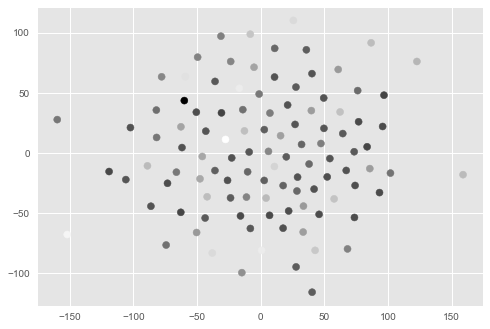

In [36]:
y = df['kcat']
tsne = manifold.TSNE()
X_ = tsne.fit_transform(X)
plt.scatter(*X_.T, c=y)

(-3, 1)

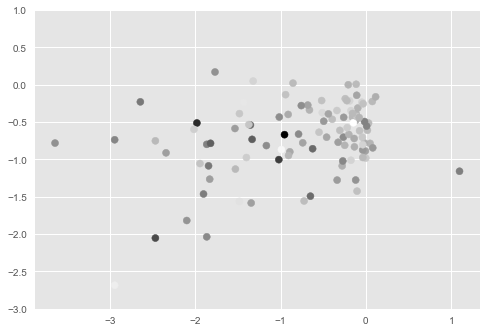

In [35]:
y = df['kcat']

net = linear_model.ElasticNetCV(cv=10, max_iter=1e9, n_alphas=1000, eps=0.01, l1_ratio=[0.5,0.9,0.99])
clf = ensemble.BaggingRegressor(net, oob_score=True, n_jobs=-1)

clf.fit(X, y)
oob = clf.oob_prediction_

#plt.scatter(y, pred)
plt.scatter(y, oob, c=df['km'])
plt.ylim((-3, 1))

In [37]:
preds = clf.predict(U_known_pos)

In [ ]:
#plt.scatter(y, pred)
plt.scatter(y, oob, c=df['km'])
plt.scatter
plt.ylim((-3, 1))

/Users/alex/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/bagging.py:986: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


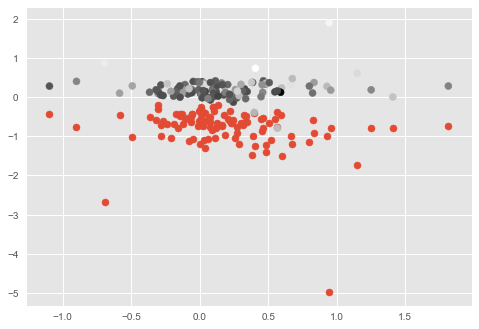

In [34]:
y = df['km']

net = linear_model.ElasticNetCV(cv=10, max_iter=1e9, n_alphas=1000, eps=0.01, l1_ratio=[0.5,0.9,0.99])
clf = ensemble.BaggingRegressor(net, oob_score=True, n_jobs=-1)

clf.fit(X, y)
oob = clf.oob_prediction_

plt.scatter(y, pred)
plt.scatter(y, oob, c=df['kcat'])